In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('Iris.csv')
data.head(6)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6928\50088075.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SepalLengthCm'])


<Axes: xlabel='SepalLengthCm', ylabel='Density'>

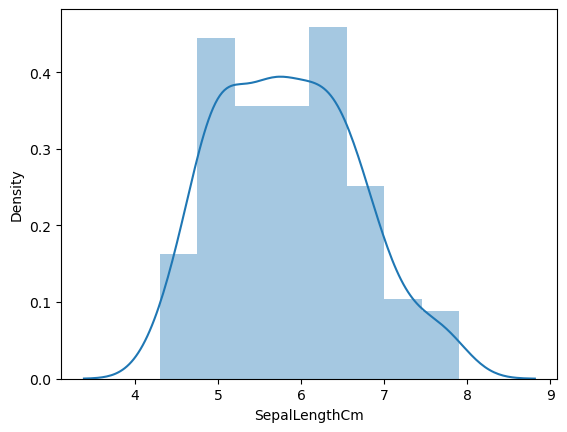

In [4]:
sns.distplot(data['SepalLengthCm'])


In [5]:
data.head(4)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa


In [7]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df = data.drop('Species',axis = 1)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [10]:
x=data.iloc[:,:-2]
x.head(1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,1,5.1,3.5,1.4


In [11]:
y = df.iloc[:,-1:]
y.head(2)

,PetalWidthCm
0,0.2
1,0.2


In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (112, 4)

Training data-y- Shape:	 (112, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (38, 4)

Testing data(y-Outcome) Shape:	 (38, 1)


In [14]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
print('*'*100)
print('Linear Regression Model')
print('*'*100)
print('\n Training Phase')
lin_reg.fit(xtrain,ytrain)
print('Hyperparameter:\n',lin_reg.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_lin_reg=lin_reg.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('Linear Regression - Performance Measures')
print('*'*100)
Accuracy_lin_reg=r2_score(ytest,ypred_lin_reg)
MSE_lin_reg=mean_squared_error(ytest,ypred_lin_reg)
RMSE_lin_reg=np.sqrt(mean_squared_error(ytest,ypred_lin_reg))
print('Accuracy Score - Linear Regression:\t',Accuracy_lin_reg)
print()
print('MSE-linear Regression:\t',MSE_lin_reg)
print()
print('RMSE linear Regression:\t',RMSE_lin_reg)

****************************************************************************************************
Linear Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
Linear Regression - Performance Measures
****************************************************************************************************
Accuracy Score - Linear Regression:	 0.9464881812544127

MSE-linear Regression:	 0.03189548980342072

RMSE linear Regression:	 0.17859308442215985


In [15]:
#KNN-Regression
from sklearn.neighbors import KNeighborsRegressor
knn_reg=KNeighborsRegressor(n_neighbors=3)
print('*'*100)
print('KNN Regression Model')
print('*'*100)
print('\n Training Phase')
knn_reg.fit(xtrain,ytrain)
print('Hyperparameter:\n',knn_reg.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_knn=knn_reg.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('KNN Regression - Performance Measures')
print('*'*100)
Accuracy_knn_reg=r2_score(ytest,ypred_knn)
MSE_knn=mean_squared_error(ytest,ypred_knn)
RMSE_knn=np.sqrt(mean_squared_error(ytest,ypred_knn))
print('Accuracy Score - knn Regression:\t',Accuracy_knn_reg)
print()
print('MSE-knn Regression:\t',MSE_knn)
print()
print('RMSE knn Regression:\t',RMSE_knn)


****************************************************************************************************
KNN Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
KNN Regression - Performance Measures
****************************************************************************************************
Accuracy Score - knn Regression:	 0.9531512830145322

MSE-knn Regression:	 0.027923976608187136

RMSE knn Regression:	 0.16710468757095695


In [16]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt_reg=DecisionTreeRegressor()
print('*'*100)
print('DT Regression Model')
print('*'*100)
print('\n Training Phase')
dt_reg.fit(xtrain,ytrain)
print('Hyperparameter:\n',dt_reg.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_dt_reg=dt_reg.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('Linear Regression - Performance Measures')
print('*'*100)
Accuracy_dt_reg=r2_score(ytest,ypred_dt_reg)
MSE_dt_reg=mean_squared_error(ytest,ypred_dt_reg)
RMSE_dt_reg=np.sqrt(mean_squared_error(ytest,ypred_dt_reg))
print('Accuracy Score - DT Regression:\t',Accuracy_dt_reg)
print()
print('MSE-DT Regression:\t',MSE_dt_reg)
print()
print('RMSE DT Regression:\t',RMSE_dt_reg)

****************************************************************************************************
DT Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
Linear Regression - Performance Measures
****************************************************************************************************
Accuracy Score - DT Regression:	 0.8860913917903077

MSE-DT Regression:	 0.06789473684210527

RMSE DT Regression:	 0.26056618514708557


In [18]:
#Support Vector 
from sklearn.svm import SVR
svr=SVR()
print('*'*100)
print('SVR Regression Model')
print('*'*100)
print('\n Training Phase')
svr.fit(xtrain,ytrain)
print('Hyperparameter:\n',svr.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_svr=svr.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('SVR Regression - Performance Measures')
print('*'*100)
Accuracy_svr=r2_score(ytest,ypred_svr)
MSE_svr=mean_squared_error(ytest,ypred_svr)
RMSE_svr=np.sqrt(mean_squared_error(ytest,ypred_svr))
print('Accuracy Score - SVR Regression:\t',Accuracy_svr)
print()
print('MSE-SVR Regression:\t',MSE_svr)
print()
print('RMSE SVR Regression:\t',RMSE_svr)

****************************************************************************************************
SVR Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
SVR Regression - Performance Measures
****************************************************************************************************
Accuracy Score - SVR Regression:	 0.8858403174827286

MSE-SVR Regression:	 0.06804438860511797

RMSE SVR Regression:	 0.26085319358811376


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
#Boosting
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(base_estimator=lin_reg,n_estimators=15)
print('*'*100)
print('AdaBoost Regression Model')
print('*'*100)
print('\n Training Phase')
ada.fit(xtrain,ytrain)
print('Hyperparameter:\n',ada.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_ada=ada.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('Adaboost Regression - Performance Measures')
print('*'*100)
Accuracy_ada=r2_score(ytest,ypred_ada)
MSE_ada=mean_squared_error(ytest,ypred_ada)
RMSE_ada=np.sqrt(mean_squared_error(ytest,ypred_ada))
print('Accuracy Score - Adaboost Regression:\t',Accuracy_ada)
print()
print('MSE-Adaboost Regression:\t',MSE_ada)
print()
print('RMSE Adaboost Regression:\t',RMSE_ada)

****************************************************************************************************
AdaBoost Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'base_estimator__copy_X': True, 'base_estimator__fit_intercept': True, 'base_estimator__n_jobs': None, 'base_estimator__positive': False, 'base_estimator': LinearRegression(), 'estimator': None, 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 15, 'random_state': None}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
Adaboost Regression - Performance Measures
****************************************************************************************************
Accuracy Score - Adaboost Regression:	 0.947588001358417

MSE-Adaboost Regression:	 0.031239946752648226

RMSE Adaboost Regression:	 0.17674825813186457


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [21]:
#Geadienr Boosting
from sklearn.ensemble import GradientBoostingRegressor
grad_boost=GradientBoostingRegressor(n_estimators=15)
print('*'*100)
print('GradientBoosting Regression Model')
print('*'*100)
print('\n Training Phase')
grad_boost.fit(xtrain,ytrain)
print('Hyperparameter:\n',grad_boost.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_grad_boost=grad_boost.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('GradientBoosting Regression - Performance Measures')
print('*'*100)
Accuracy_grad_boost=r2_score(ytest,ypred_grad_boost)
MSE_grad_boost=mean_squared_error(ytest,ypred_grad_boost)
RMSE_grad_boost=np.sqrt(mean_squared_error(ytest,ypred_grad_boost))
print('Accuracy Score - GradientBoosting Regression:\t',Accuracy_grad_boost)
print()
print('MSE-GradientBoosting Regression:\t',MSE_grad_boost)
print()
print('RMSE GradientBoosting Regression:\t',RMSE_grad_boost)

****************************************************************************************************
GradientBoosting Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 15, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
GradientBoosting Regression - Performance Measures
********************************************************************

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
scores=[('Linear Regression',Accuracy_lin_reg),
 ('KNN Regression',Accuracy_knn_reg),
 ('Decision Tree Regression',Accuracy_dt_reg),
 ('SVR',Accuracy_svr),
 ('Adaboost Regressor',Accuracy_ada),
 ('Gradient Boost Regressor',Accuracy_grad_boost),
 
 ]
Acc_scores=pd.DataFrame(scores,columns=['Model','Accuracy_score'])
print(Acc_scores.sort_values(by='Accuracy_score',ascending=False))


                      Model  Accuracy_score
1            KNN Regression        0.953151
4        Adaboost Regressor        0.947588
0         Linear Regression        0.946488
5  Gradient Boost Regressor        0.913840
2  Decision Tree Regression        0.886091
3                       SVR        0.885840


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'KNN Regression'),
  Text(2, 0, 'Decision Tree Regression'),
  Text(3, 0, 'SVR'),
  Text(4, 0, 'Adaboost Regressor'),
  Text(5, 0, 'Gradient Boost Regressor')])

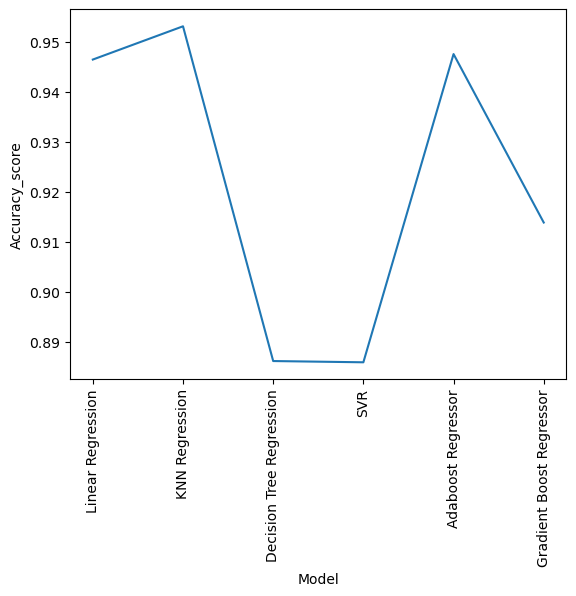

In [24]:
sns.lineplot(x=Acc_scores['Model'],y=Acc_scores['Accuracy_score'],data=Acc_scores)
plt.xticks(rotation=90)
